# بسم الله الرحمن الرحيم

In [31]:
from utils import *
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt 


In [32]:
df = pd.read_csv("dataset/body_level_classification_train.csv")
df_original= cleaning_data(df).copy()
all_class_train,all_class_test=data_spliting(df_original,1/3)
## shuffling 
all_class_train = all_class_train.sample(frac=1.0, random_state=42)
all_class_test = all_class_test.sample(frac=1.0, random_state=42)
X_train=all_class_train.drop(["Body_Level"],axis=1).to_numpy()
Y_train=all_class_train["Body_Level"].to_numpy()
X_test =all_class_test.drop(["Body_Level"],axis=1).to_numpy()
Y_test =all_class_test["Body_Level"].to_numpy()


X_train, scaler= data_scaling(X_train)
X_val, X_test, Y_val, Y_test = train_test_split(X_test
                                                     , Y_test, test_size=0.5, random_state=42)
X_val = scaler.transform(X_val)
X_test=scaler.transform(X_test)

In [33]:
class_weights = all_class_train["Body_Level"].value_counts().to_dict()
total_num = sum(class_weights.values())
class_weights= { i : (total_num/(4* j )) for i ,j in zip(class_weights.keys(),class_weights.values())}
class_weights

{3: 0.5429515418502202,
 2: 0.9095940959409594,
 1: 1.8395522388059702,
 0: 1.9409448818897639}

# Applying bare Random Forest 

In [34]:
bare_RF = RandomForestClassifier(random_state=42)
bare_RF.fit(np.concatenate([X_train,X_val], axis=0)
                   ,np.concatenate([Y_train,Y_val],axis=0))

RandomForestClassifier(random_state=42)

In [35]:
bare_RF_accuracy , repo = test_model(bare_RF,X_test,Y_test,axis=False)

In [36]:
print(bare_RF_accuracy)
print(repo)

0.9308943089430894
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       0.88      0.83      0.86        36
           2       0.89      0.94      0.91        80
           3       0.96      0.96      0.96       102

    accuracy                           0.93       246
   macro avg       0.93      0.92      0.92       246
weighted avg       0.93      0.93      0.93       246



## Applying Random Forest With Class Weights

In [37]:
weights_RF = RandomForestClassifier(random_state=42,class_weight=class_weights)
weights_RF.fit(np.concatenate([X_train,X_val], axis=0)
                   ,np.concatenate([Y_train,Y_val],axis=0))

RandomForestClassifier(class_weight={0: 1.9409448818897639,
                                     1: 1.8395522388059702,
                                     2: 0.9095940959409594,
                                     3: 0.5429515418502202},
                       random_state=42)

In [38]:
weights_RF , repo = test_model(weights_RF,X_test,Y_test,axis=False)

In [39]:
print(weights_RF)
print(repo)

0.926829268292683
              precision    recall  f1-score   support

           0       0.96      0.89      0.93        28
           1       0.86      0.83      0.85        36
           2       0.90      0.94      0.92        80
           3       0.96      0.96      0.96       102

    accuracy                           0.93       246
   macro avg       0.92      0.91      0.91       246
weighted avg       0.93      0.93      0.93       246



## HyperParameter Tuning on Random Forest 

In [40]:

# Define the random forest model
best_RF_model = RandomForestClassifier(random_state=42)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200,300,400,500,600],
    'max_depth': [10, 20, 30, None],
}

# Define the grid search object
grid_search = GridSearchCV(estimator=best_RF_model, param_grid=param_grid, cv=5,verbose=2)

# Fit the grid search object to the data
grid_search.fit(np.concatenate([X_train,X_val], axis=0)
                   ,np.concatenate([Y_train,Y_val],axis=0))

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.2s
[CV] END .....................max_depth=10, n_estimators=200; total time=   0.4s
[CV] END .....................max_depth=10, n_e

[CV] END .....................max_depth=30, n_estimators=600; total time=   1.4s
[CV] END .....................max_depth=30, n_estimators=600; total time=   1.0s
[CV] END .....................max_depth=30, n_estimators=600; total time=   1.0s
[CV] END .....................max_depth=30, n_estimators=600; total time=   0.9s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END ...................

In [42]:
best_RF_model_accuracy , repo = test_model(grid_search.best_estimator_,X_test,Y_test,axis=False)

In [43]:
print(best_RF_model_accuracy )
print(repo)

0.9349593495934959
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       0.86      0.86      0.86        36
           2       0.91      0.93      0.92        80
           3       0.96      0.97      0.97       102

    accuracy                           0.93       246
   macro avg       0.93      0.92      0.93       246
weighted avg       0.94      0.93      0.94       246



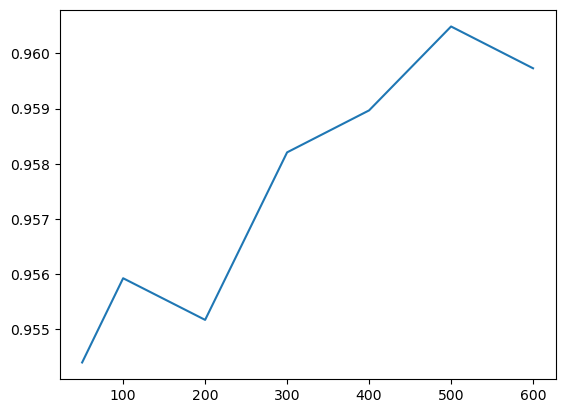

In [44]:
estimators_max_depth_10 = []
accuracies_max_depth_10 = []

for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    if(params["max_depth"]==10):
        estimators_max_depth_10.append(params["n_estimators"])
        accuracies_max_depth_10.append(mean_score)
        
estimators_max_depth_10
accuracies_max_depth_10

plt.plot(estimators_max_depth_10,accuracies_max_depth_10)
plt.show()


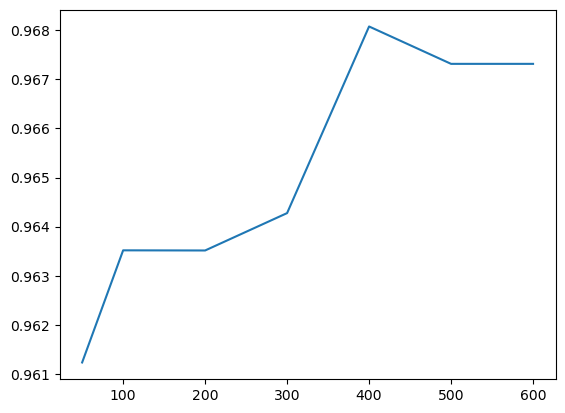

In [45]:
estimators_max_depth_20 = []
accuracies_max_depth_20 = []

for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    if(params["max_depth"]==20):
        estimators_max_depth_20.append(params["n_estimators"])
        accuracies_max_depth_20.append(mean_score)
        


plt.plot(estimators_max_depth_20,accuracies_max_depth_20)
plt.show()

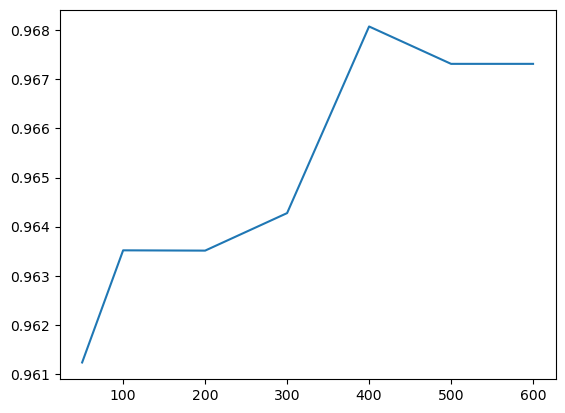

In [46]:
estimators_max_depth_30 = []
accuracies_max_depth_30 = []

for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    if(params["max_depth"]==30):
        estimators_max_depth_30.append(params["n_estimators"])
        accuracies_max_depth_30.append(mean_score)
        


plt.plot(estimators_max_depth_30,accuracies_max_depth_30)
plt.show()



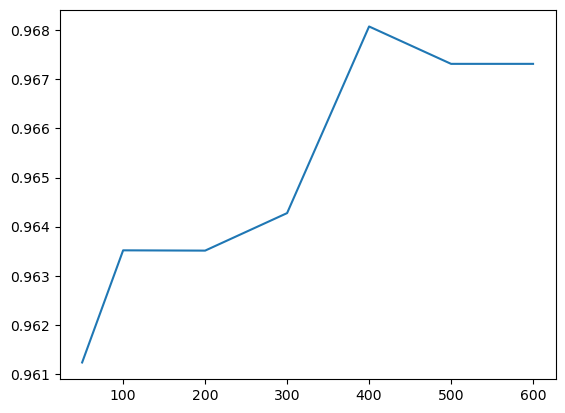

In [47]:
estimators_max_depth_None = []
accuracies_max_depth_None = []

for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    if(params["max_depth"]==None):
        estimators_max_depth_None.append(params["n_estimators"])
        accuracies_max_depth_None.append(mean_score)
        


plt.plot(estimators_max_depth_None,accuracies_max_depth_None)
plt.show()



In [54]:
print(cv_results["params"][np.argmax(cv_results["mean_test_score"])]["max_depth"])
print(cv_results["params"][np.argmax(cv_results["mean_test_score"])]["n_estimators"])

20
400


In [57]:
best_model_RF= RandomForestClassifier(n_estimators=400,max_depth=20,class_weight=class_weights)
# concat class weights with it 
best_model_RF.fit(np.concatenate([X_train,X_val], axis=0)
                   ,np.concatenate([Y_train,Y_val],axis=0))


RandomForestClassifier(class_weight={0: 1.9409448818897639,
                                     1: 1.8395522388059702,
                                     2: 0.9095940959409594,
                                     3: 0.5429515418502202},
                       max_depth=20, n_estimators=400)

In [58]:
best_RF_model_accuracy , repo = test_model(best_model_RF,X_test,Y_test,axis=False)

In [61]:
print(best_RF_model_accuracy)
print(repo)

0.9308943089430894
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       0.88      0.83      0.86        36
           2       0.90      0.93      0.91        80
           3       0.95      0.97      0.96       102

    accuracy                           0.93       246
   macro avg       0.93      0.91      0.92       246
weighted avg       0.93      0.93      0.93       246



# oversampling 

In [71]:
oversampled= over_sampling(all_class_train,sampling_ratio=0.5)
class_weights = oversampled["Body_Level"].value_counts().to_dict()
total_num = sum(class_weights.values())
class_weights= { i : (total_num/(4* j )) for i ,j in zip(class_weights.keys(),class_weights.values())}
class_weights

X_train=oversampled.drop(["Body_Level"],axis=1).to_numpy()
Y_train=oversampled["Body_Level"].to_numpy()
X_test =all_class_test.drop(["Body_Level"],axis=1).to_numpy()
Y_test =all_class_test["Body_Level"].to_numpy()
X_train, scaler= data_scaling(X_train)
X_val, X_test, Y_val, Y_test = train_test_split(X_test
                                                     , Y_test, test_size=0.5, random_state=42)
X_val = scaler.transform(X_val)
X_test=scaler.transform(X_test)

# Applying bare Random Forest after oversampling

In [72]:
bare_RF_oversampled = RandomForestClassifier(random_state=42)
bare_RF_oversampled.fit(np.concatenate([X_train,X_val], axis=0)
                   ,np.concatenate([Y_train,Y_val],axis=0))

RandomForestClassifier(random_state=42)

In [73]:
bare_RF_oversampled_accuracy , repo = test_model(bare_RF,X_test,Y_test,axis=False)


In [74]:
print(bare_RF_oversampled_accuracy)
print(repo)

0.8455284552845529
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        28
           1       0.87      0.56      0.68        36
           2       0.78      0.79      0.78        80
           3       0.85      0.98      0.91       102

    accuracy                           0.85       246
   macro avg       0.88      0.80      0.83       246
weighted avg       0.85      0.85      0.84       246



In [76]:
weights_RF_oversampled = RandomForestClassifier(random_state=42)
weights_RF_oversampled.fit(np.concatenate([X_train,X_val], axis=0)
                   ,np.concatenate([Y_train,Y_val],axis=0))

RandomForestClassifier(random_state=42)

In [77]:
weights_RF_oversampled_accuracy , repo = test_model(weights_RF_oversampled,
                                                    X_test,Y_test,axis=False)


In [78]:
print(weights_RF_oversampled_accuracy)
print(repo)

0.9186991869918699
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       0.85      0.81      0.83        36
           2       0.88      0.91      0.90        80
           3       0.95      0.96      0.96       102

    accuracy                           0.92       246
   macro avg       0.92      0.90      0.91       246
weighted avg       0.92      0.92      0.92       246



In [79]:

# Define the random forest model
best_RF_oversampled_model = RandomForestClassifier(random_state=42,class_weight=class_weights)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200,300,400,500,600],
    'max_depth': [10, 20, 30, None],
}

# Define the grid search object
grid_search = GridSearchCV(estimator=best_RF_oversampled_model, param_grid=param_grid, cv=5,verbose=2)

# Fit the grid search object to the data
grid_search.fit(np.concatenate([X_train,X_val], axis=0)
                   ,np.concatenate([Y_train,Y_val],axis=0))

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.2s
[CV] END .....................max_depth=10, n_estimators=200; total time=   0.4s
[CV] END .....................max_depth=10, n_e

[CV] END .....................max_depth=30, n_estimators=600; total time=   1.3s
[CV] END .....................max_depth=30, n_estimators=600; total time=   1.1s
[CV] END .....................max_depth=30, n_estimators=600; total time=   1.3s
[CV] END .....................max_depth=30, n_estimators=600; total time=   1.2s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END ...................

In [83]:
best_RF_oversampled_model_accuracy , repo = test_model(grid_search.best_estimator_
                                                       ,X_test,Y_test,axis=False)

In [84]:
print(best_RF_oversampled_model_accuracy )
print(repo)

0.9308943089430894
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       0.86      0.86      0.86        36
           2       0.90      0.93      0.91        80
           3       0.96      0.96      0.96       102

    accuracy                           0.93       246
   macro avg       0.93      0.92      0.92       246
weighted avg       0.93      0.93      0.93       246

